#  PTID-CDS-JUN22-1329

#  PRCP-1013-Walking and Running Classification

## About Dataset

* This dataset contains accelerometer and gyroscope data associated when a person is running and walking. 
* The target is to create a LSTM model to predict the state of body from input of sensor.
* we have created a model that predicts if a person is walking or running based on the data from accelerometer and gyroscope from both left and right wrists.
* The dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. 
* This data is represented by following columns 
 acceleration_x
 acceleration_y
 acceleration_z
 gyro_x
 gyro_y
 gyro_z
 There is an activity type represented by "activity" column which acts as label and reflects following activities:

 "0": walking
 "1": running
 Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

 "0": left wrist
 "1": right wrist
 Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('walkrun.csv')
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


### Basic Checks

In [3]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
#insights : There is no null value inthe dataset.First three columns are object type.

In [7]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [8]:
#insights: There are two discrete numeric values in wrist and activity column

In [9]:
data.describe(include="O")

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [10]:
#Insights: All the informations of the data is measured by same person victor on 12 different dates and different timings.

In [11]:
data.duplicated().sum()

0

In [12]:
# insights: no duplicate values in the dataset.

### Exploratory Data Analysis

In [13]:
df=data[['wrist','activity','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']]
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [14]:
df.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [15]:
#insights: 44223 data samples are of walking and 44365 are of running

<AxesSubplot:ylabel='activity'>

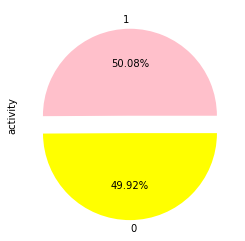

In [16]:
df.activity.value_counts().plot.pie(autopct='%.2f%%',explode=[0,0.2],colors=['Pink','yellow'])

In [17]:
df.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

In [18]:
#insights:42330 data samples are recorded on left wrist and 46258 are on right wrist

<AxesSubplot:ylabel='wrist'>

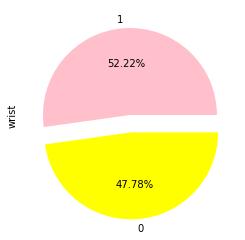

In [19]:
df.wrist.value_counts().plot.pie(autopct='%.2f%%',explode=[0,0.2],colors=['Pink','yellow'])

In [20]:
df_left_wrist=df.loc[df.wrist==0]
df_left_wrist

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [21]:
# insights: 42330 samples on left wrist

In [22]:
df_right_wrist=df.loc[df.wrist==1]
df_right_wrist

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
3992,1,0,-0.2755,-0.6548,-0.2600,-0.7421,-0.1897,0.3908
3993,1,0,-0.4671,-1.1306,-0.3932,2.0026,0.0179,-2.8429
3994,1,0,-0.3690,-0.9195,-0.4181,1.2551,-0.7557,-1.6562
3995,1,0,-0.4922,-1.2525,-0.5725,-0.1228,0.7247,0.3566
3996,1,0,-0.3956,-1.2612,-0.2493,-1.8060,0.7310,2.1702
...,...,...,...,...,...,...,...,...
54799,1,1,-0.2007,-0.1754,0.1220,0.4007,-1.0399,-0.7537
54800,1,1,-3.0454,-0.0096,0.1557,-2.6437,-2.9311,-3.3749
54801,1,1,0.2776,1.0468,-0.0626,-1.1740,1.2339,1.2124
54802,1,1,-3.0619,1.2824,0.5984,3.9788,0.4811,1.8914


In [23]:
#insights:46258 samples on right wrist

In [24]:
df_walk_left= df.loc[(df.activity==0)&(df.wrist==0)]
df_walk_left

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [25]:
#insights:18622 samples of walking have been taken from left wrist

In [26]:
df_walk=data.loc[(df.activity==0)]
df_walk

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [27]:
# insights:44223 samples of walking

In [28]:
df_run=data.loc[(df.activity==1)]
df_run

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
755,2017-6-30,20:33:44:257565021,viktor,0,1,1.2842,0.0526,-0.2362,-1.9543,2.4977,1.3038
756,2017-6-30,20:33:44:457401990,viktor,0,1,0.3057,0.4504,-0.1000,1.4730,-0.5391,-2.6030
757,2017-6-30,20:33:44:658038020,viktor,0,1,1.0601,-0.9857,-0.0732,1.4300,-0.9917,-2.3499
758,2017-6-30,20:33:44:858160972,viktor,0,1,-0.1065,-0.7203,0.2003,-0.4013,0.4240,3.0591
759,2017-6-30,20:33:45:57991981,viktor,0,1,1.0069,0.3441,-0.2760,-1.6086,2.3222,1.4736
...,...,...,...,...,...,...,...,...,...,...,...
87750,2017-7-9,20:6:14:916516005,viktor,0,1,0.4733,-0.8527,-1.1410,0.6127,1.6790,4.8951
87751,2017-7-9,20:6:15:116733014,viktor,0,1,0.0295,0.6734,-0.2263,-0.6867,0.1436,0.0705
87752,2017-7-9,20:6:15:315971016,viktor,0,1,2.5963,-0.4055,-2.4827,0.2144,0.2478,-2.0818
87753,2017-7-9,20:6:15:515972971,viktor,0,1,-0.5401,-0.3176,0.5294,1.0999,0.0617,-0.4169


In [29]:
# Insights:44365 samlples of running

In [30]:
df_walk_right=data.loc[(df.activity==0)&(df.wrist==1)]
df_walk_right

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
3992,2017-7-10,15:56:7:911439001,viktor,1,0,-0.2755,-0.6548,-0.2600,-0.7421,-0.1897,0.3908
3993,2017-7-10,15:56:8:111880004,viktor,1,0,-0.4671,-1.1306,-0.3932,2.0026,0.0179,-2.8429
3994,2017-7-10,15:56:8:311222970,viktor,1,0,-0.3690,-0.9195,-0.4181,1.2551,-0.7557,-1.6562
3995,2017-7-10,15:56:8:512109994,viktor,1,0,-0.4922,-1.2525,-0.5725,-0.1228,0.7247,0.3566
3996,2017-7-10,15:56:8:711878001,viktor,1,0,-0.3956,-1.2612,-0.2493,-1.8060,0.7310,2.1702
...,...,...,...,...,...,...,...,...,...,...,...
43434,2017-7-16,15:9:59:364697992,viktor,1,0,-0.5310,-1.2392,-0.3069,1.6715,0.0633,-3.0554
43435,2017-7-16,15:9:59:564779996,viktor,1,0,-0.0639,-1.2049,-0.3303,-0.4000,-4.7084,-0.7287
43436,2017-7-16,15:9:59:764540970,viktor,1,0,-0.4529,-0.8289,-0.2172,0.4909,0.5352,-1.4149
43437,2017-7-16,15:9:59:964565992,viktor,1,0,-0.5244,-1.0755,-0.3233,-0.2010,0.4154,0.9403


In [31]:
# insights:25601 samples of walking are taken from right wrist

In [32]:
df_run_left= df.loc[(df.activity==1)&(df.wrist==0)]
df_run_left

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
755,0,1,1.2842,0.0526,-0.2362,-1.9543,2.4977,1.3038
756,0,1,0.3057,0.4504,-0.1000,1.4730,-0.5391,-2.6030
757,0,1,1.0601,-0.9857,-0.0732,1.4300,-0.9917,-2.3499
758,0,1,-0.1065,-0.7203,0.2003,-0.4013,0.4240,3.0591
759,0,1,1.0069,0.3441,-0.2760,-1.6086,2.3222,1.4736
...,...,...,...,...,...,...,...,...
87750,0,1,0.4733,-0.8527,-1.1410,0.6127,1.6790,4.8951
87751,0,1,0.0295,0.6734,-0.2263,-0.6867,0.1436,0.0705
87752,0,1,2.5963,-0.4055,-2.4827,0.2144,0.2478,-2.0818
87753,0,1,-0.5401,-0.3176,0.5294,1.0999,0.0617,-0.4169


In [33]:
# insights: 23708 samples of running are taken from left wrist.

In [34]:
df_run_right= df.loc[(df.activity==1)&(df.wrist==1)]
df_run_right

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
8329,1,1,-1.8268,-0.7392,-0.4644,0.9234,1.6628,1.7441
8330,1,1,0.1010,-0.3978,0.2554,0.2241,-0.7656,-3.0843
8331,1,1,-2.5088,0.2492,-0.1247,-1.9650,-0.1891,-1.4122
8332,1,1,-0.1079,0.3356,-0.1762,1.0870,0.7910,3.4783
8333,1,1,-2.1378,-0.6646,-0.1353,0.9627,0.8825,1.2429
...,...,...,...,...,...,...,...,...
54799,1,1,-0.2007,-0.1754,0.1220,0.4007,-1.0399,-0.7537
54800,1,1,-3.0454,-0.0096,0.1557,-2.6437,-2.9311,-3.3749
54801,1,1,0.2776,1.0468,-0.0626,-1.1740,1.2339,1.2124
54802,1,1,-3.0619,1.2824,0.5984,3.9788,0.4811,1.8914


In [35]:
# insights:20657 samples of running are taken from right wrist.

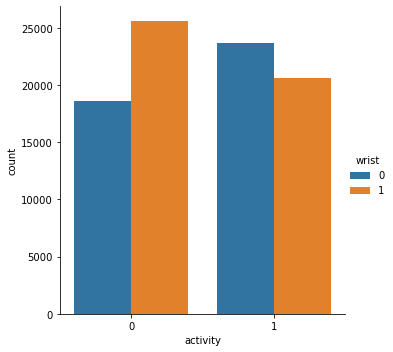

In [36]:
sns.catplot(x = "activity", kind="count", hue = "wrist",data=df)

In [37]:
# insights: more walking data on right wrist and more running data on left wrist in the complete dataset.

In [38]:
sensor_col = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


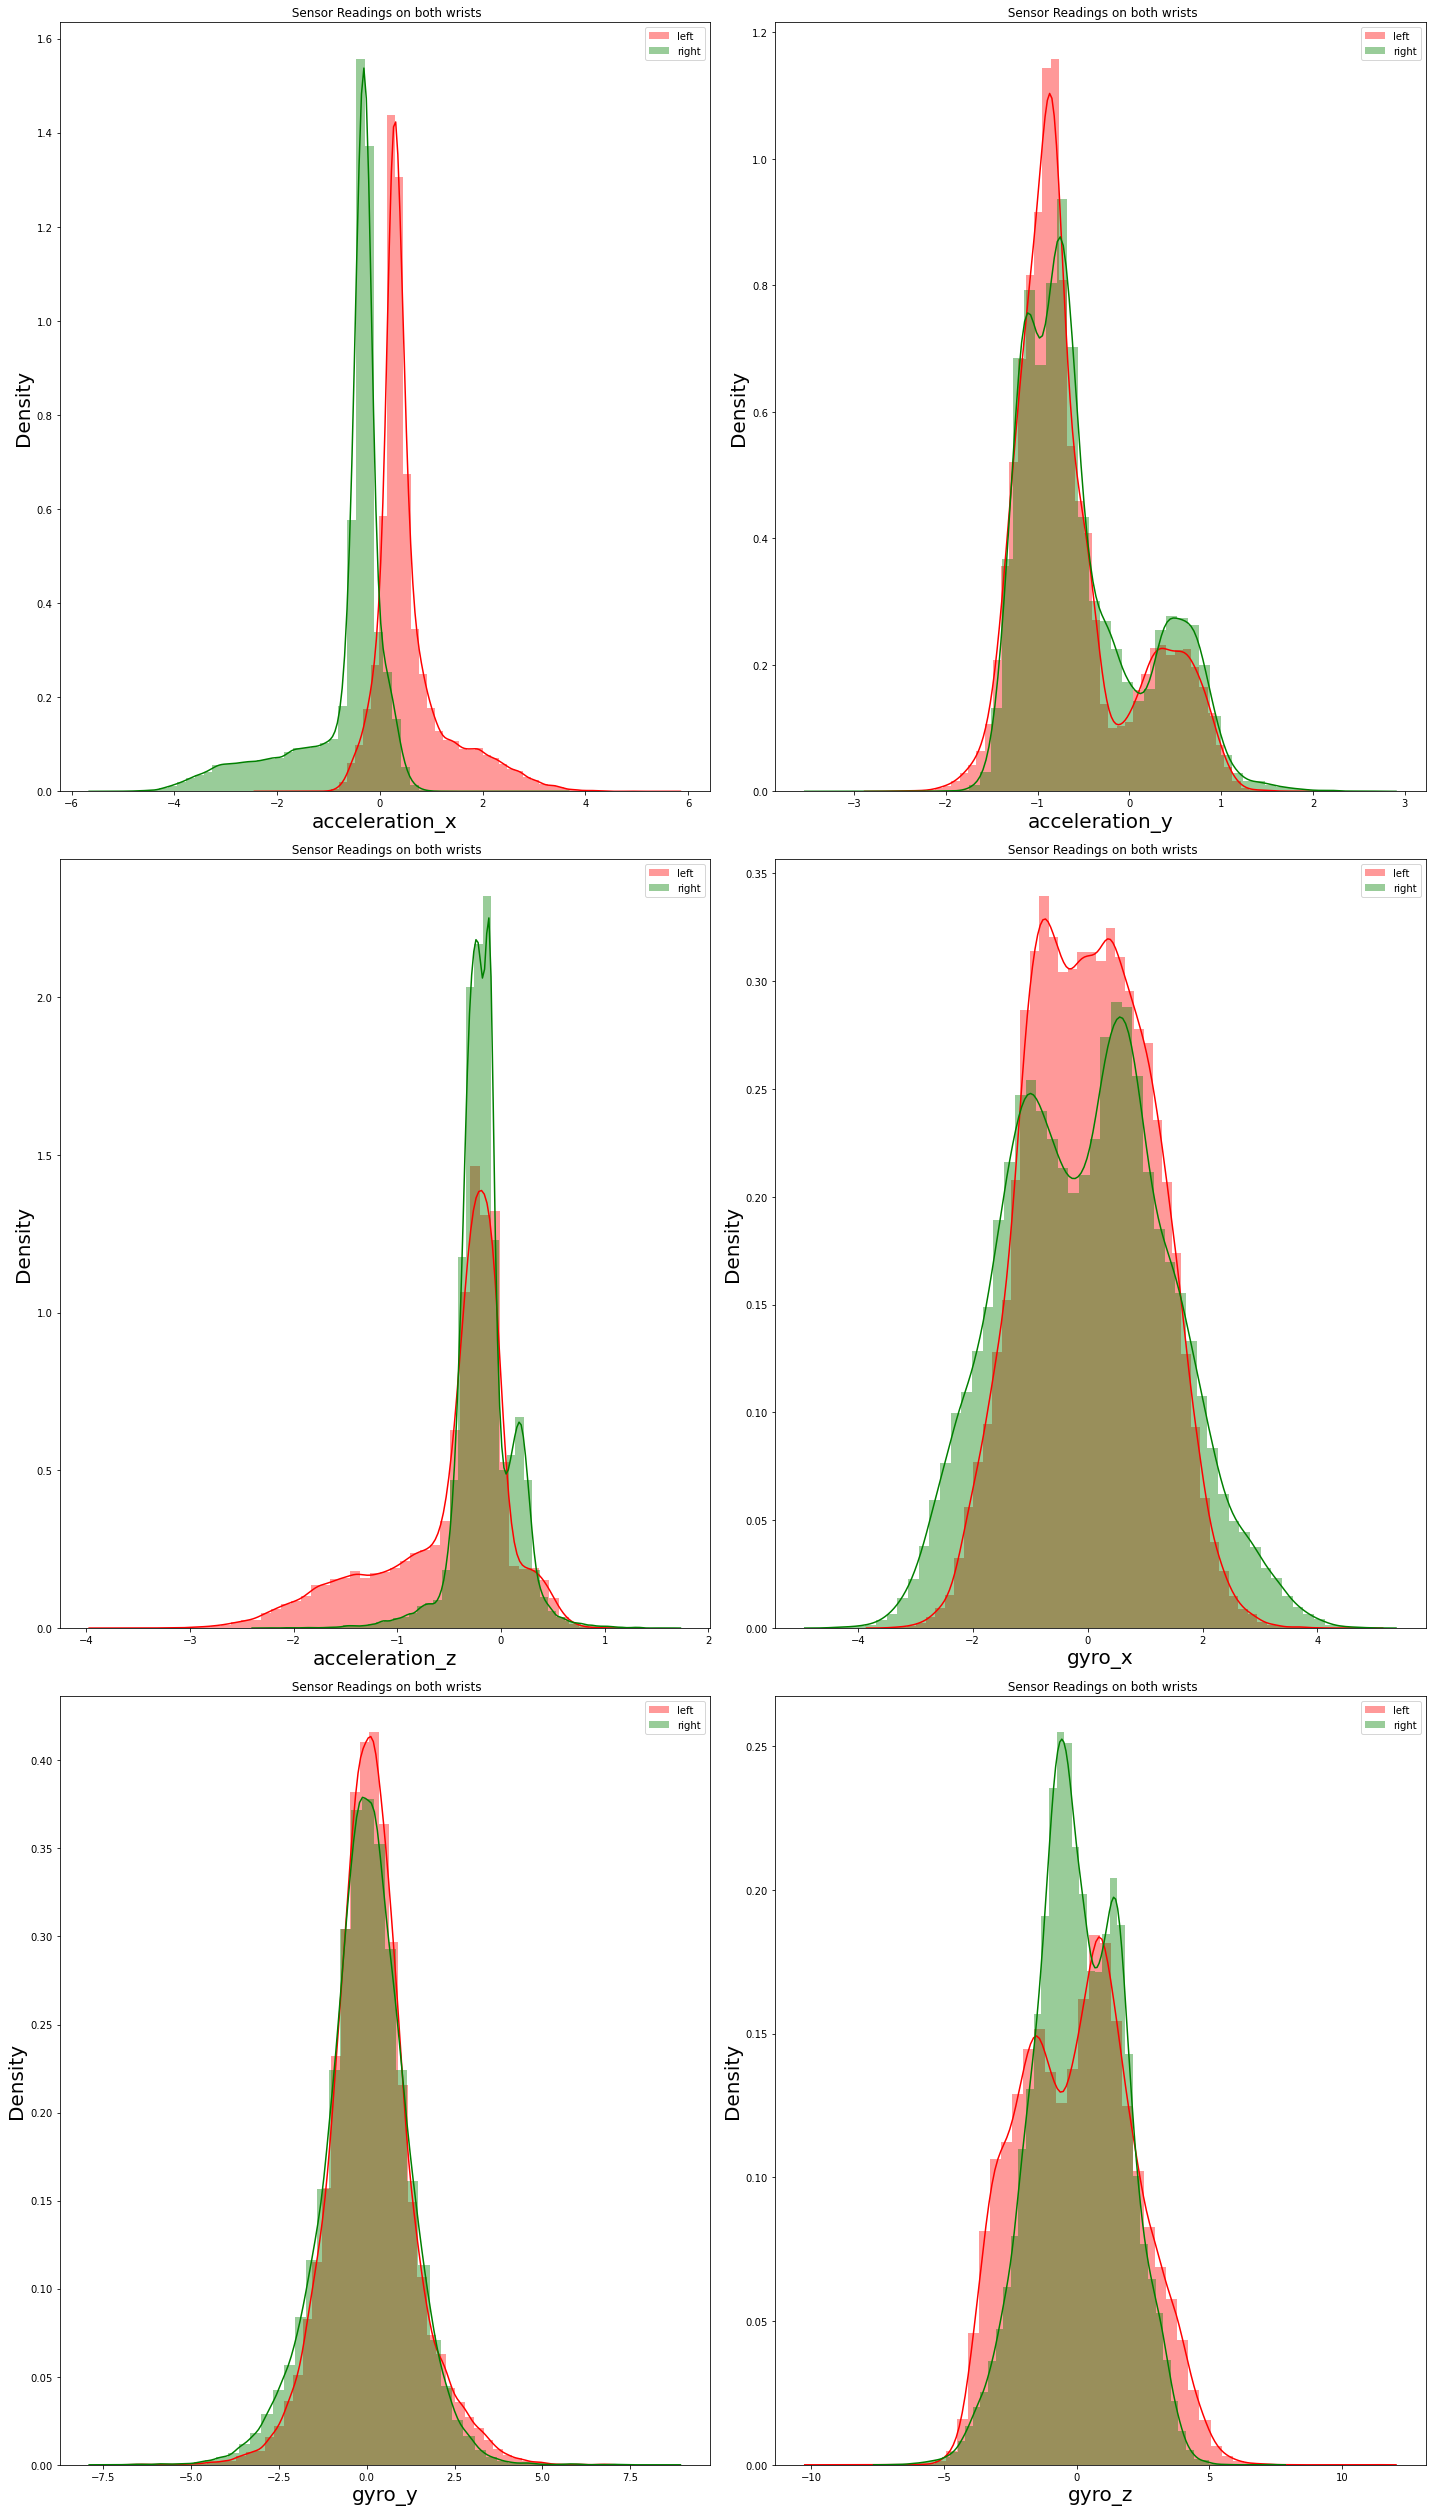

In [39]:

plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for c in sensor_col :
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df_left_wrist[c],color="r",label='left')
        sns.distplot(df_right_wrist[c],color="g",label='right')
        plt.title(" Sensor Readings on both wrists")
        plt.xlabel(c,fontsize=20)
        plt.ylabel('Density',fontsize=20)
        plt.legend()
    plotnumber+=1
plt.tight_layout()

In [40]:
#insights: There is slight difference in readings of sensor parameters on both the wrists

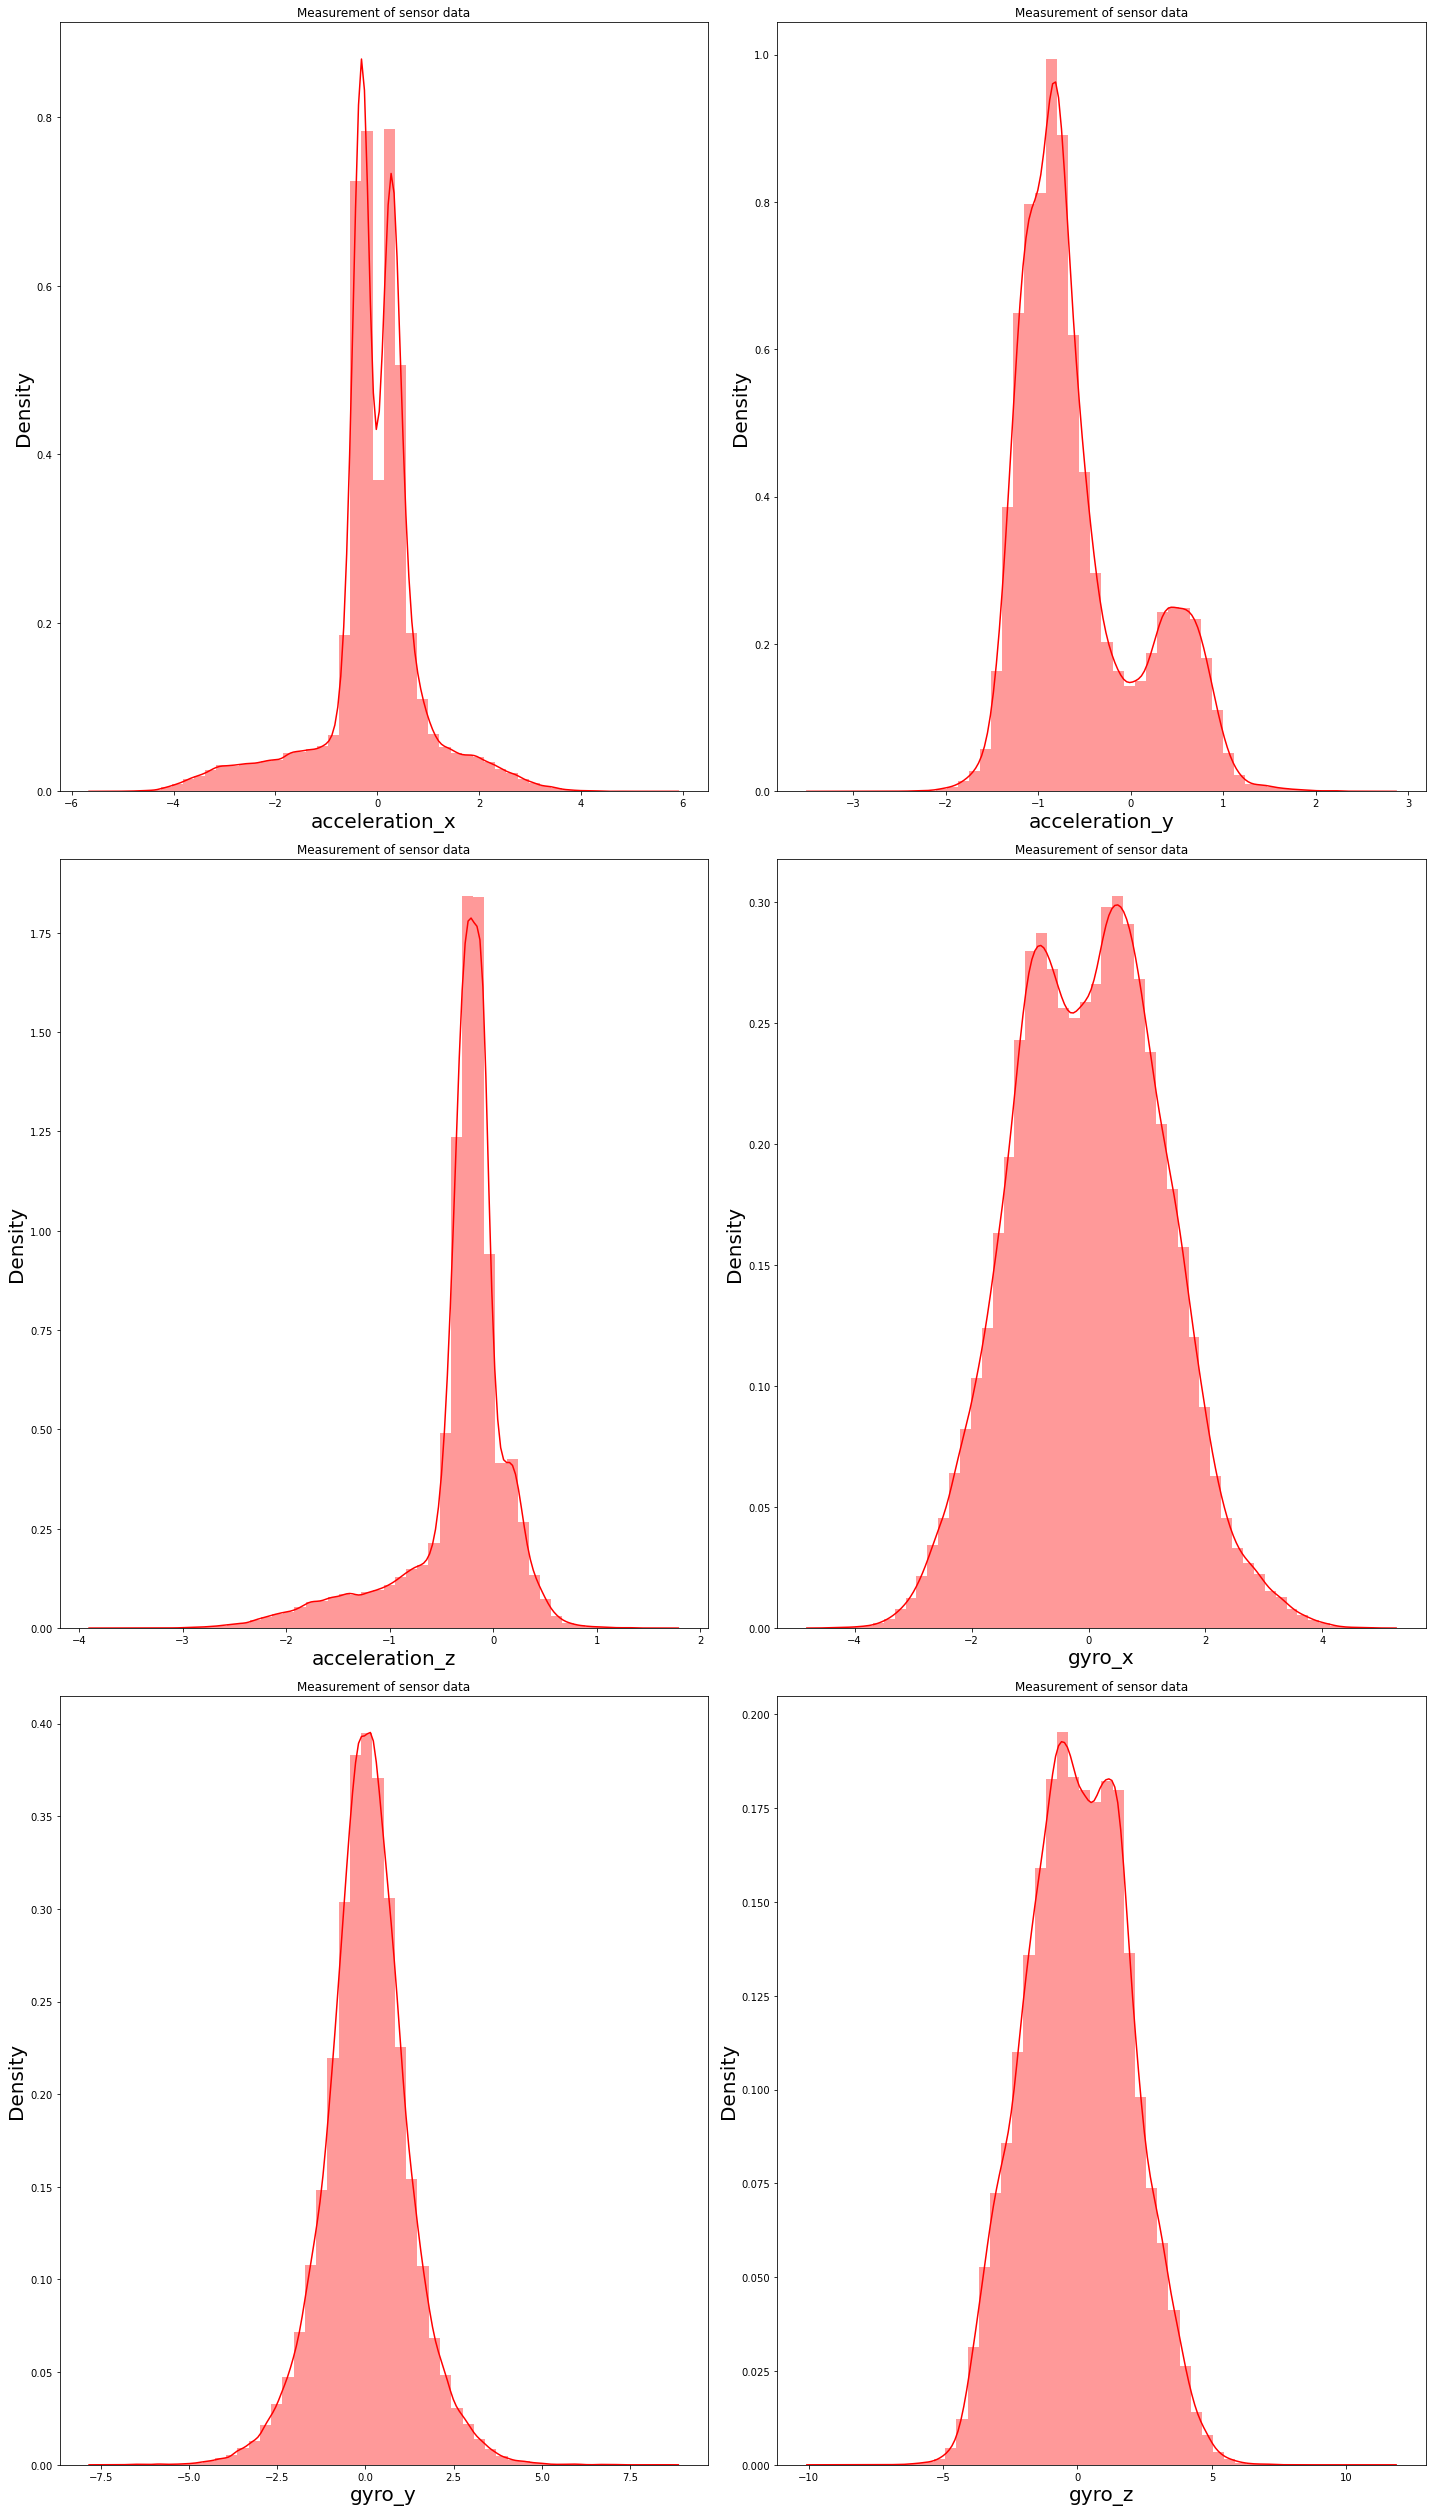

In [41]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for c in sensor_col :
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[c],color="r")
        plt.title("Measurement of sensor data")
        plt.xlabel(c,fontsize=20)
        plt.ylabel('Density',fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [42]:
# insights :
# For x-axis, accelerometer data is roughly symmetric and the double peak pattern is because of two "wrist" values.
# Same behavior is noticed in gyro_X .
# For y-axis, gyroscope data has normal distribution with mean = 0.
# Acceleration_y data on the other hand looks rightly skewed, and has the most inconsistent distribution among all the ratio features.
# For z-axis, gyro_Z data looks symmetric. Acceleration_z data is slightly -vely skewed but not as much as y-axis data.

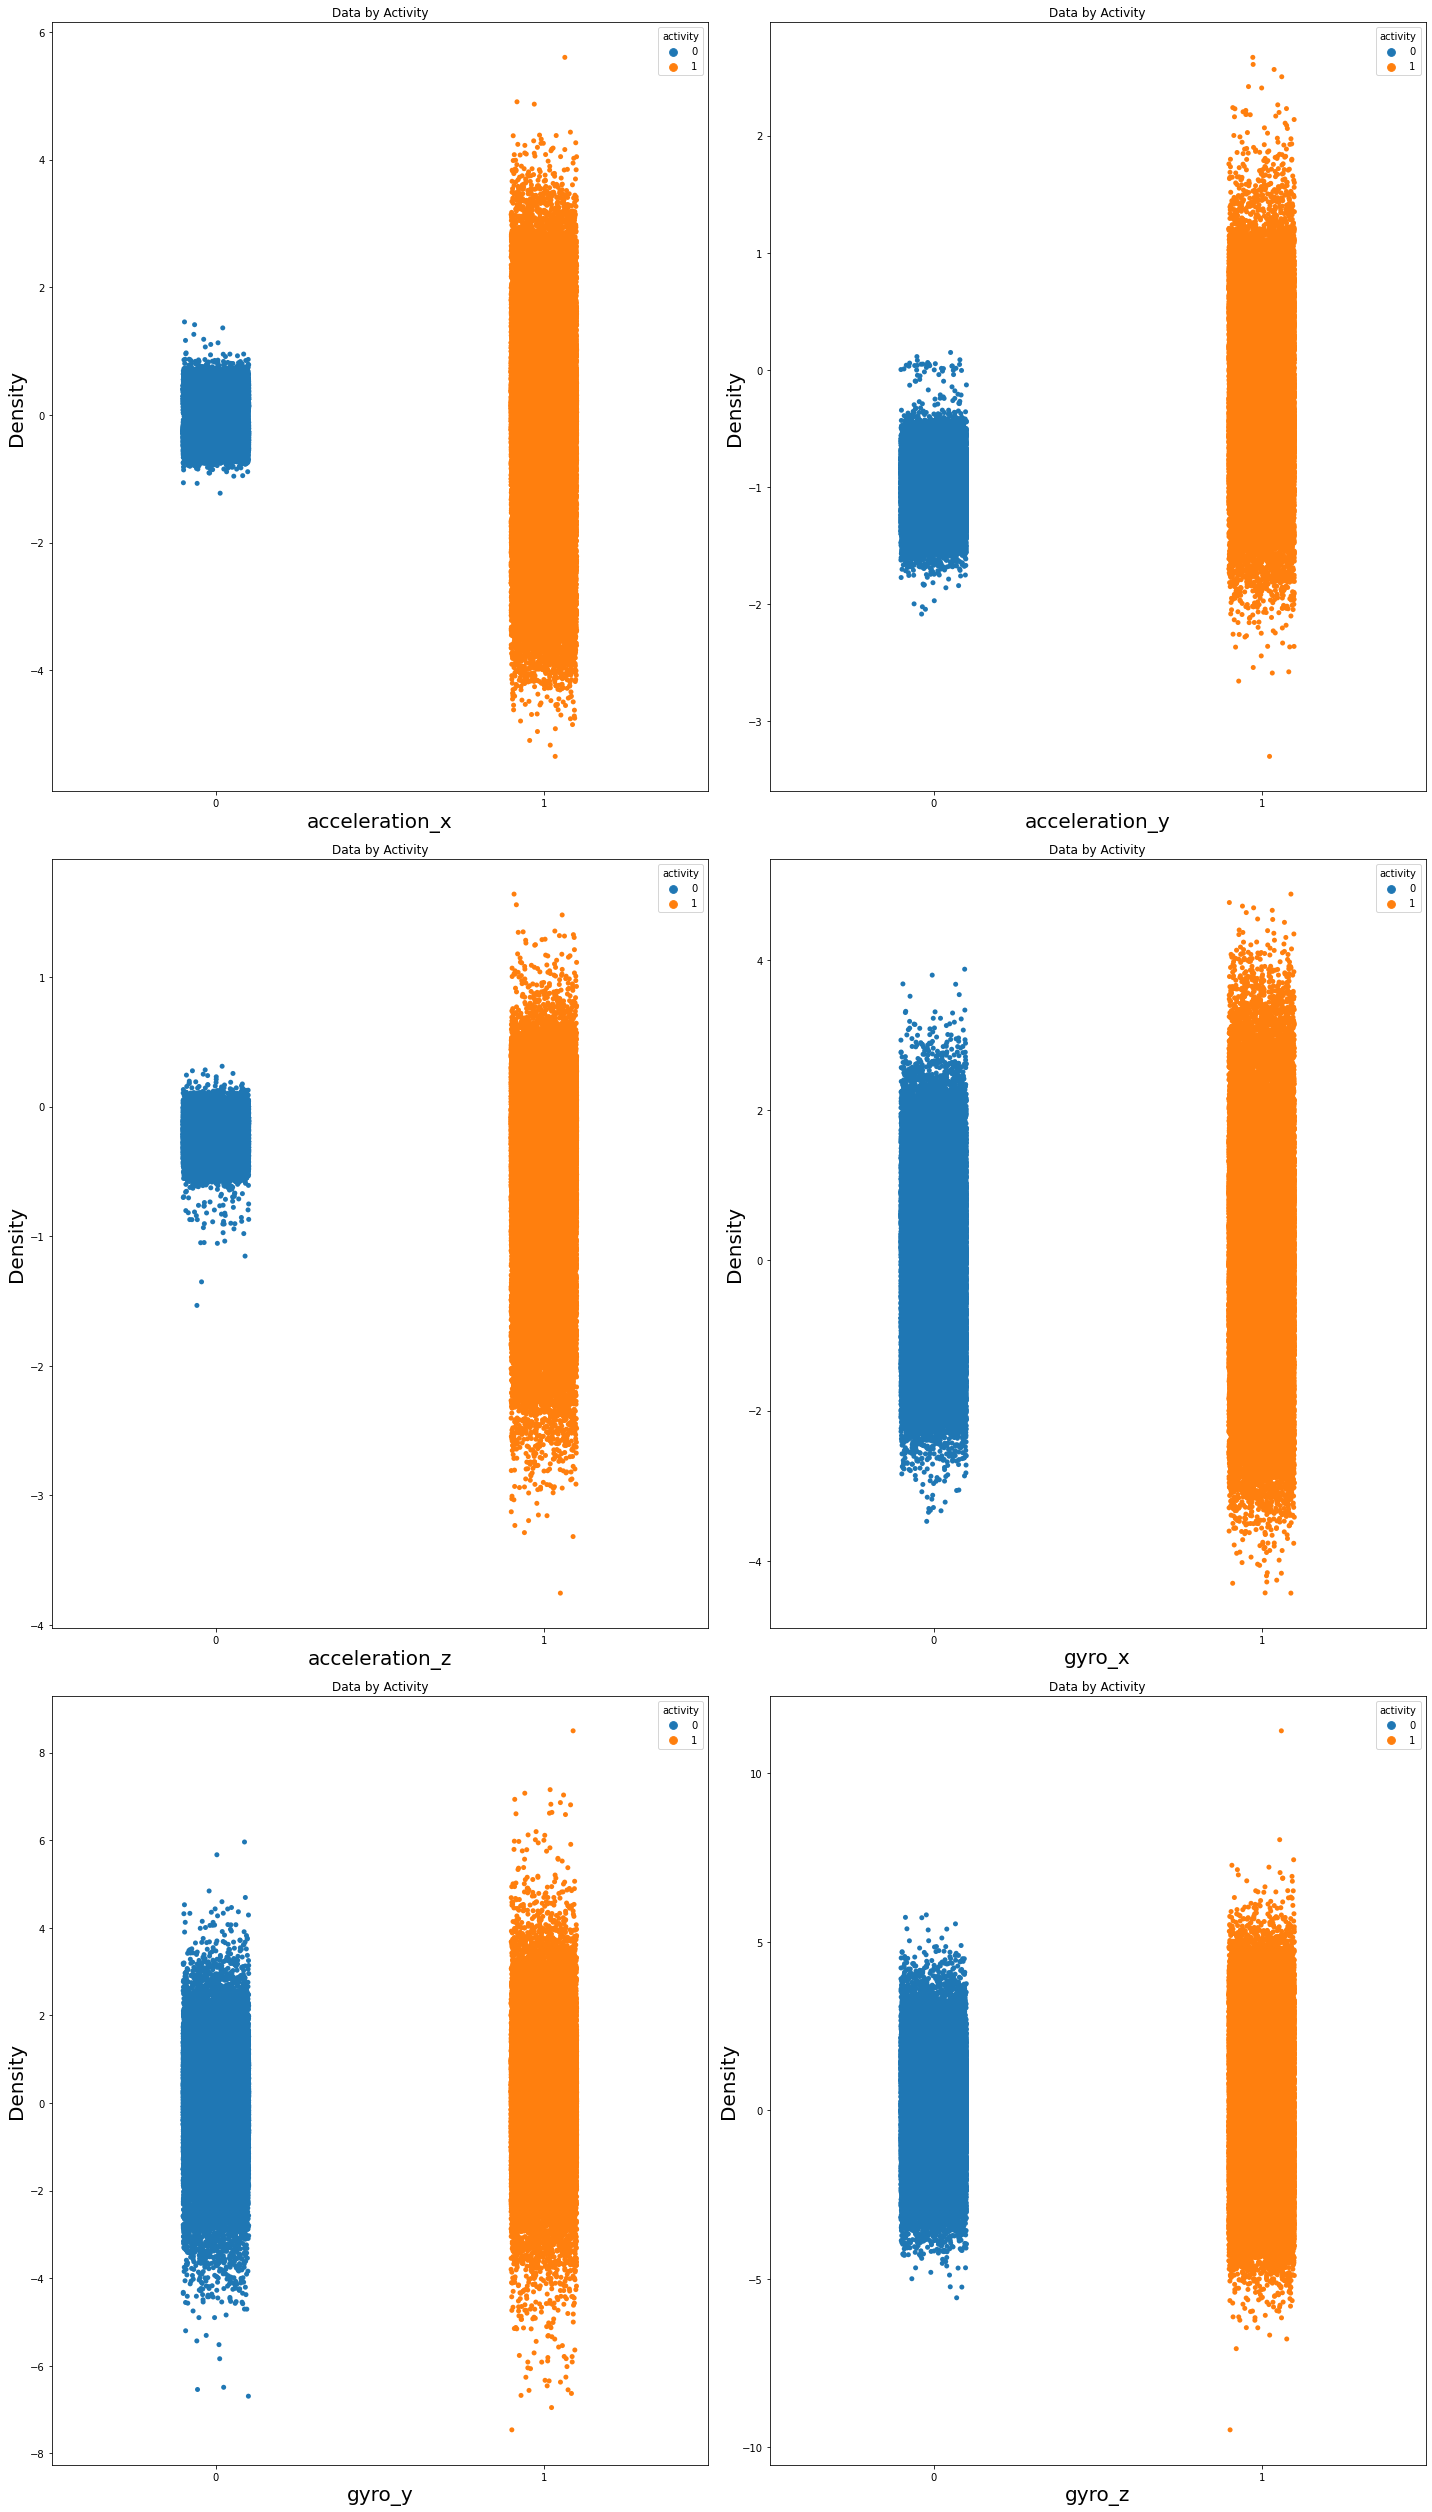

In [43]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for c in sensor_col :
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.stripplot(x='activity',y=df[c],hue='activity',data=df)
        plt.title("Data by Activity")
        plt.xlabel(c,fontsize=20)
        plt.ylabel('Density',fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [44]:
# insights:
#"acceleration_x", "acceleration_z" show clear differentiation between walking and running,with running yielding much higher(+ve, -ve based on the wrist) values.
#"acceleration_y" shows some separation but not as pronounced as the two other dimensions.
#"gyroscope" data on the other hand look quite similar for walking and running.

<AxesSubplot:>

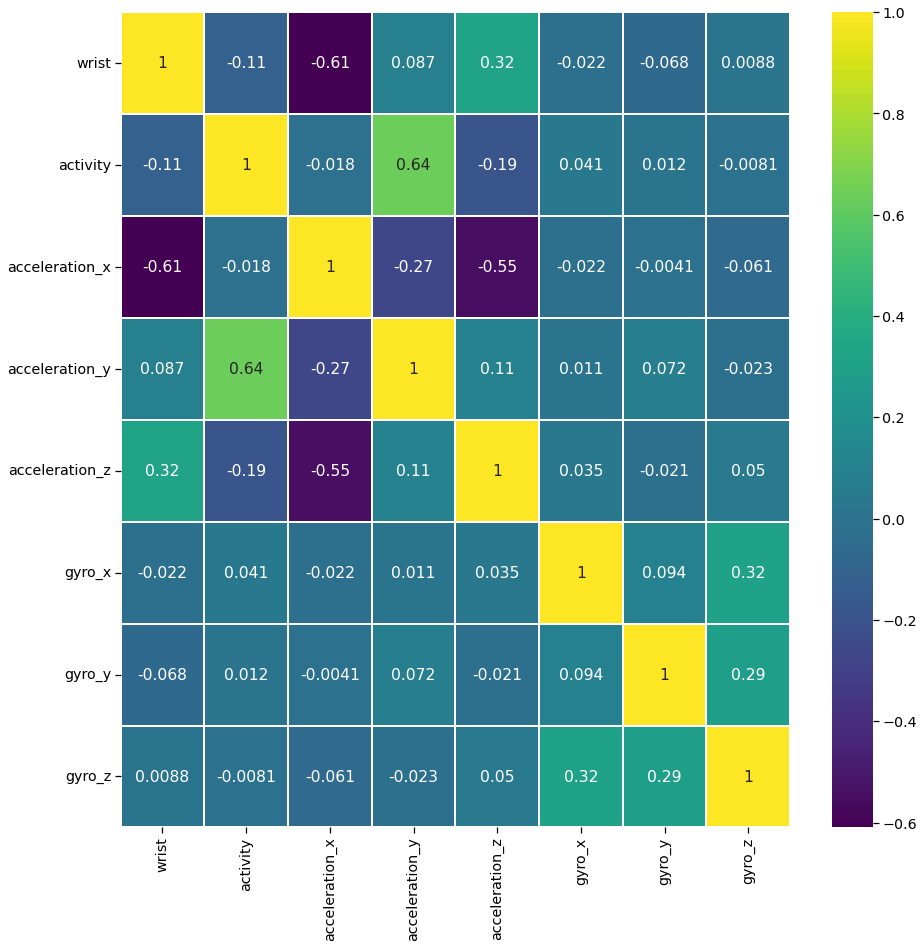

In [45]:
 plt.figure( figsize=(15,15))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,cmap="viridis",linewidth=2)

In [46]:
# insights:acceleration_y and activity are  highly +vly correlated.acc_x and acc_z are _vely correlated

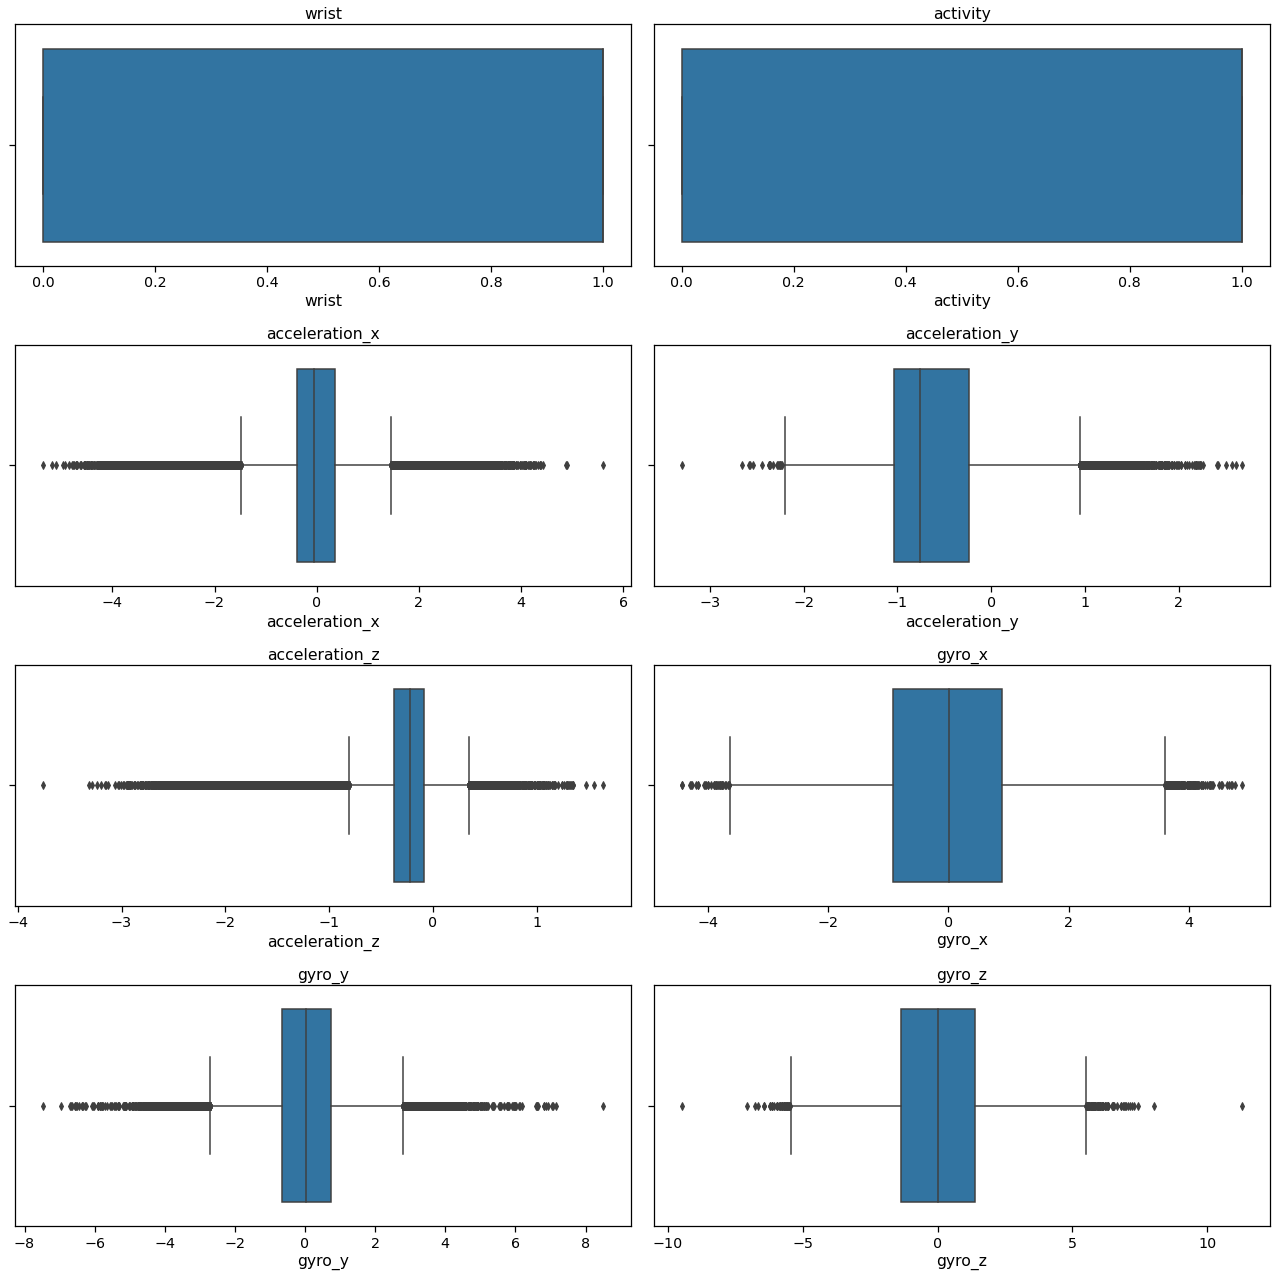

In [47]:
plt.figure(figsize=(18,18))
i=1
for c in df.columns:
    plt.subplot(4,2,i)
    sns.boxplot(x=df[c])
    plt.title(c)
    i+=1
    plt.tight_layout()

In [48]:
# Insights: As outliers are seen in clusters.it seems they are the part of dataset only

# Feature selection

In [49]:
y = df["activity"]
X = df[["acceleration_x", "acceleration_y", "acceleration_z", "wrist", "gyro_x", "gyro_y", "gyro_z"]]
X

,acceleration_x,acceleration_y,acceleration_z,wrist,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,0,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,0,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,0,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,0,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,0,-1.5165,0.4560,-1.7755


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [51]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.33668266, -0.33231618,  0.6293112 , ..., -0.05039065,
        -0.00392358, -1.5419494 ],
       [ 0.74013342, -0.85156246,  0.16342314, ..., -0.14349622,
        -0.013684  ,  0.05462392],
       [ 0.50997229, -1.39586742,  0.79323478, ..., -0.72973418,
         0.05764218, -1.28448139],
       ...,
       [ 0.52859919, -0.93463579,  0.06420624, ..., -1.16015794,
        -0.26395131, -0.67066385],
       [ 0.3307379 , -0.44895295,  0.4890107 , ..., -1.21321296,
         0.34937044, -0.93910129],
       [ 0.3852315 , -0.36177911,  0.45778716, ...,  0.09106279,
         0.87409756,  0.65768097]])

In [52]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
print(y. value_counts())
X_sm,y_sm=sm.fit_resample(X_scaled,y)
print(y_sm.value_counts())

1    44365
0    44223
Name: activity, dtype: int64
0    44365
1    44365
Name: activity, dtype: int64


In [53]:
X_sm

array([[ 0.33668266, -0.33231618,  0.6293112 , ..., -0.05039065,
        -0.00392358, -1.5419494 ],
       [ 0.74013342, -0.85156246,  0.16342314, ..., -0.14349622,
        -0.013684  ,  0.05462392],
       [ 0.50997229, -1.39586742,  0.79323478, ..., -0.72973418,
         0.05764218, -1.28448139],
       ...,
       [-0.29741032, -0.69552298,  0.10874538, ...,  1.19733118,
        -0.06079641, -1.23078127],
       [ 0.46109419, -0.27025586,  0.32055724, ...,  0.4048037 ,
         1.05430815,  0.59981977],
       [-0.57566604, -0.30315572,  0.23233369, ...,  0.51622293,
         0.29817929, -0.46287841]])

# Model Creation

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,
                                test_size=0.2,random_state=10)

In [55]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=.01,
                       max_iter=100,
                       random_state=2) 
model.fit(X_train,y_train) 
y_predict_proba = model.predict_proba(X_test)
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


In [56]:
y_predict_proba

array([[1.24333521e-09, 9.99999999e-01],
       [6.03476122e-05, 9.99939652e-01],
       [1.00000000e+00, 2.17577228e-10],
       ...,
       [3.97977152e-03, 9.96020228e-01],
       [3.41817485e-09, 9.99999997e-01],
       [1.22124533e-14, 1.00000000e+00]])

In [57]:
y_predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.9951256621210414
Test accuracy : 0.9934069649498478


In [59]:
pd.crosstab(y_test,y_predict)

col_0,0,1
activity,,
0,8726,55
1,62,8903


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8781
           1       0.99      0.99      0.99      8965

    accuracy                           0.99     17746
   macro avg       0.99      0.99      0.99     17746
weighted avg       0.99      0.99      0.99     17746



In [ ]:
### CONCLUSION:
* The dataset analyzed in this notebook can be considered as a high quality one since it properly formatted,delivers clear values and doesn't contain NaN values
* The outliers are in clusters so they can be considered as a part of dataset only
* Regarding the sensor data presented in the dataset, one can make a conclusion that the data presented doesn't suffer from skewing and normally distributed.
* There is slightly  change  in readings of data on both wrists means wrist hardly affects the different sensor parameters
* acceleration_x", "acceleration_z" show clear differentiation between walking and running,with running yielding much higher(+ve, -ve based on the wrist) values.
*"acceleration_y" shows some separation but not as the two other dimensions.
*"gyroscope" data on the other hand look quite similar for walking and running.
* finally MLP classifier is applied to state whether the person is walking or running based input sensor parameters which is giving 99.3% accuracy.